In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('data/traffic_dataset_with_trend.csv')
print(df.shape)
print(df["Timestamp"].min(), df["Timestamp"].max())
df.head()

(8736, 4)
2023-01-01 00:00:00 2023-12-30 23:00:00


,Timestamp,Weather,Events,Traffic Volume
0,2023-01-01 00:00:00,Cloudy,False,803.0
1,2023-01-01 01:00:00,Clear,False,861.0
2,2023-01-01 02:00:00,Clear,False,582.0
3,2023-01-01 03:00:00,Cloudy,False,236.0
4,2023-01-01 04:00:00,Cloudy,False,569.0


In [14]:
df["Weather"].value_counts(normalize=True)

Weather
Clear     0.591117
Cloudy    0.309409
Rain      0.089057
Snow      0.010417
Name: proportion, dtype: float64

In [15]:
df["Events"].value_counts(normalize=True)

Events
False    0.899267
True     0.100733
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Traffic Volume Over Time')

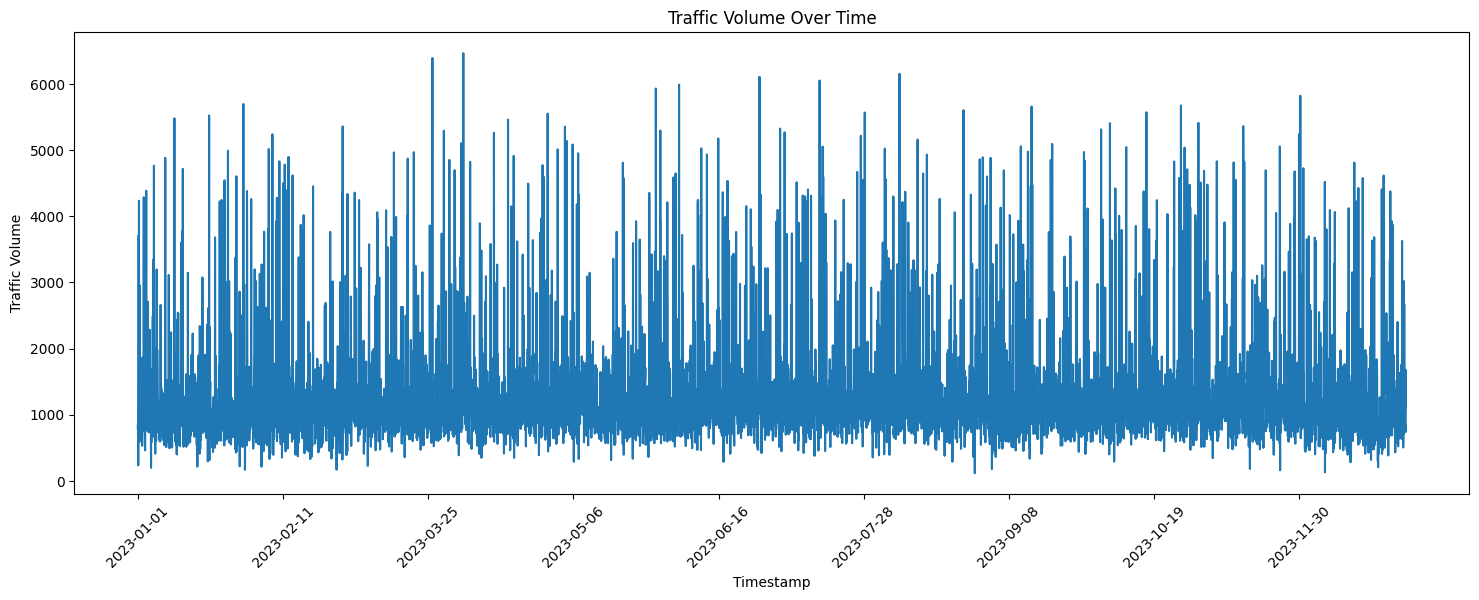

In [12]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Line plot
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df)
plt.xticks(ticks=df['Timestamp'][::1000], rotation=45)

plt.title('Traffic Volume Over Time')

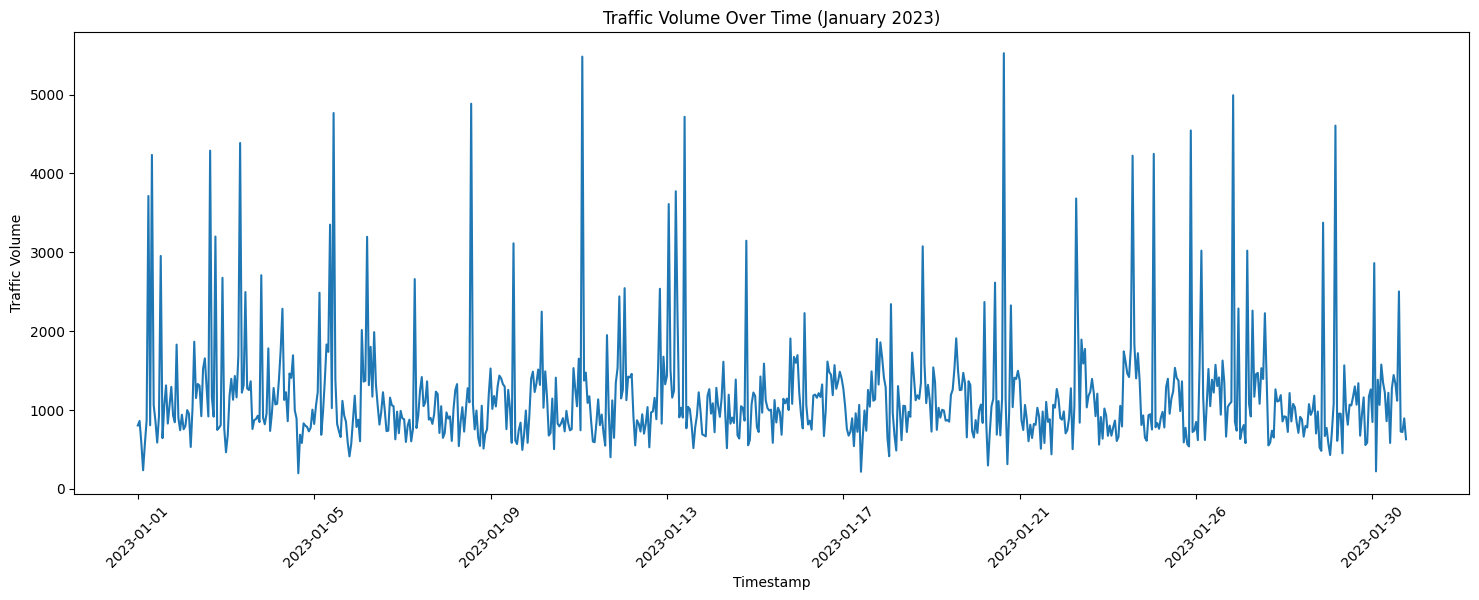

In [19]:
# Line plot for only a month
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df[df['Timestamp'] < '2023-01-31'])
plt.xticks(ticks=df[df['Timestamp'] < '2023-01-31']['Timestamp'][::100], rotation=45)

plt.title('Traffic Volume Over Time (January 2023)')
plt.show()

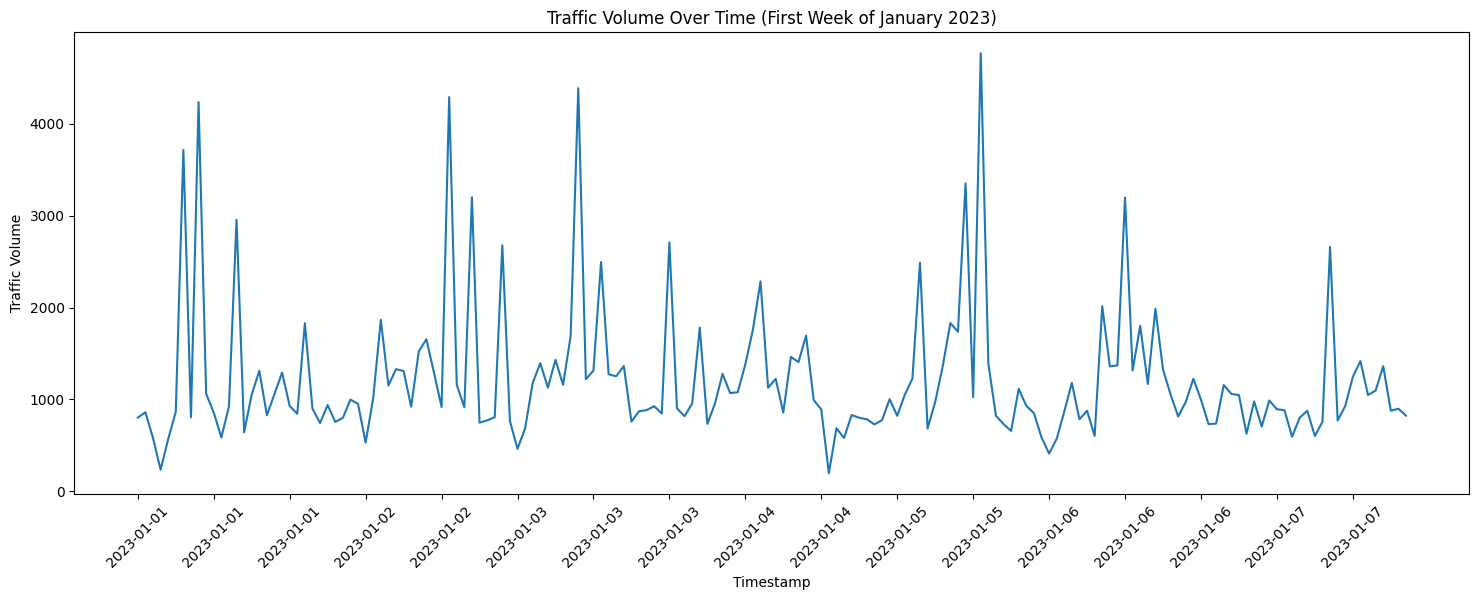

In [20]:
# Line plot for only a week
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-08')])
plt.xticks(ticks=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-08')]['Timestamp'][::10], rotation=45)

plt.title('Traffic Volume Over Time (First Week of January 2023)')
plt.show()


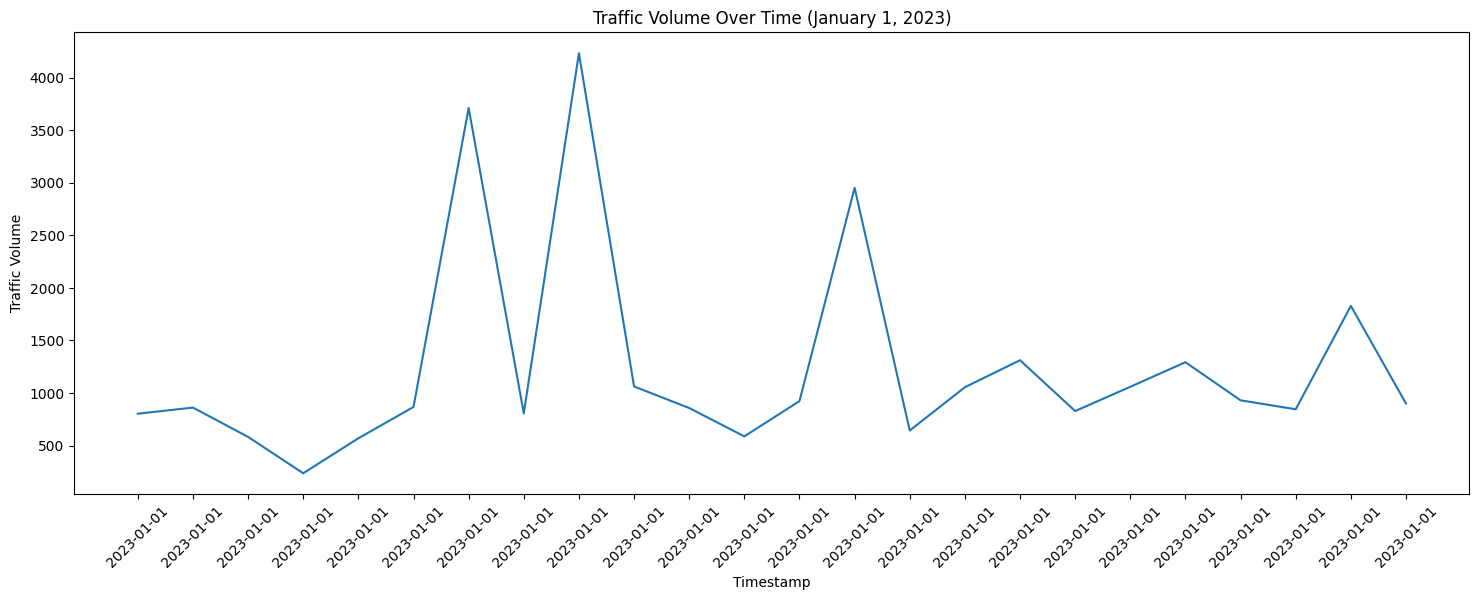

In [21]:
# Line plot for only a day
plt.figure(figsize=(18, 6))
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-02')])
plt.xticks(ticks=df[(df['Timestamp'] >= '2023-01-01') & (df['Timestamp'] < '2023-01-02')]['Timestamp'][::1], rotation=45)

plt.title('Traffic Volume Over Time (January 1, 2023)')
plt.show()

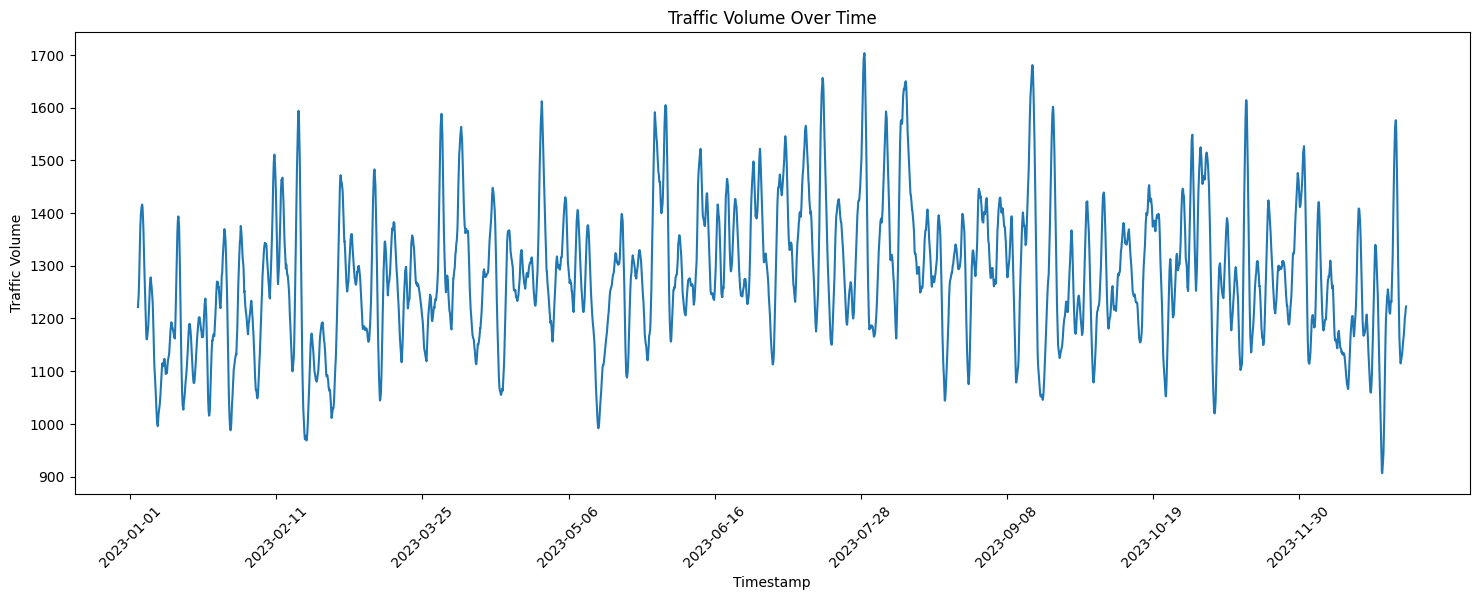

In [25]:
# smoothe data
plt.figure(figsize=(18, 6))
# Smooth the data using rolling mean
df['Traffic Volume'] = df['Traffic Volume'].rolling(window=30).mean()
sns.lineplot(x='Timestamp', y='Traffic Volume', data=df,errorbar=None)
plt.xticks(ticks=df['Timestamp'][::1000], rotation=45)

plt.title('Traffic Volume Over Time')
plt.show()

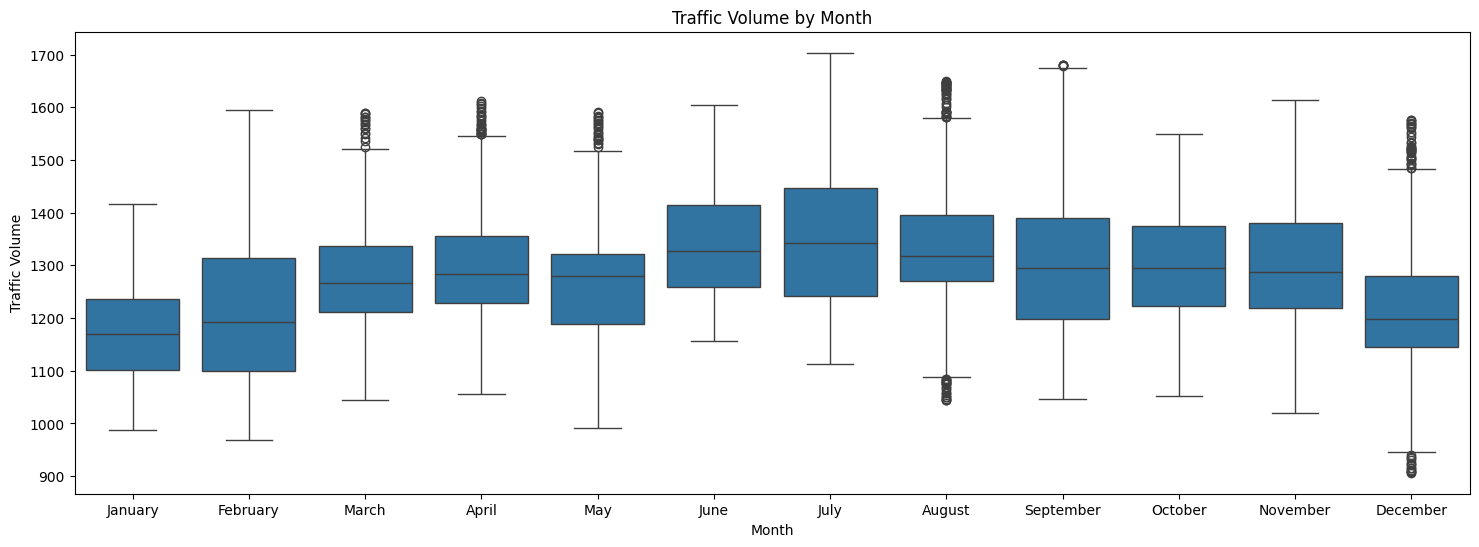

In [ ]:
# box plot per month
df['Month'] = df['Timestamp'].dt.month_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Month', y='Traffic Volume', data=df)
plt.title('Traffic Volume by Month')
plt.show()

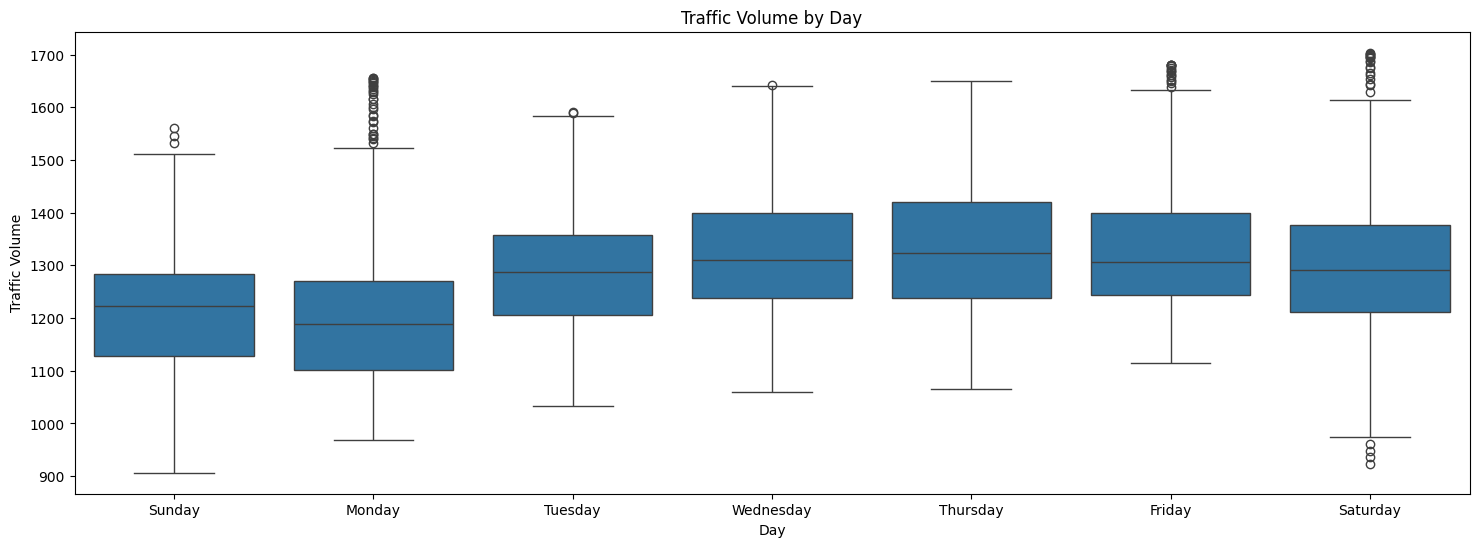

In [28]:
# box plot per day
df['Day'] = df['Timestamp'].dt.day_name()
plt.figure(figsize=(18, 6))
sns.boxplot(x='Day', y='Traffic Volume', data=df)
plt.title('Traffic Volume by Day')
plt.show()